#  Project Overview: Predicting Product Sales Using Advertising Data

This project explores how money spent on advertising across different media — **TV**, **Radio**, and **Newspaper** — influences **product sales**.  
Using a **Linear Regression model**, we aim to predict the sales amount based on the advertising budget, helping businesses make data-driven marketing decisions.

---

###  Dataset Description

| Column        | Description                                                                                             | Example |
| ------------- | ------------------------------------------------------------------------------------------------------- | ------- |
| **TV**        | Money spent on **TV advertisements** (in thousands of dollars).                                         | `230.1` |
| **Radio**     | Money spent on **Radio advertisements** (in thousands of dollars).                                      | `37.8`  |
| **Newspaper** | Money spent on **Newspaper advertisements** (in thousands of dollars).                                  | `69.2`  |
| **Sales**     | **Units sold** (in thousands), i.e., how many products were sold. This is the **target/output** column. | `22.1`  |

---

**Goal:**  
Build a machine learning model that predicts product sales based on advertising spending, providing insights into which media contribute most effectively to sales growth.


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
#Data loading
df = pd.read_csv("Ads_Sale.csv")
df.head()#first 5 rows.


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#No missing values in my data.
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

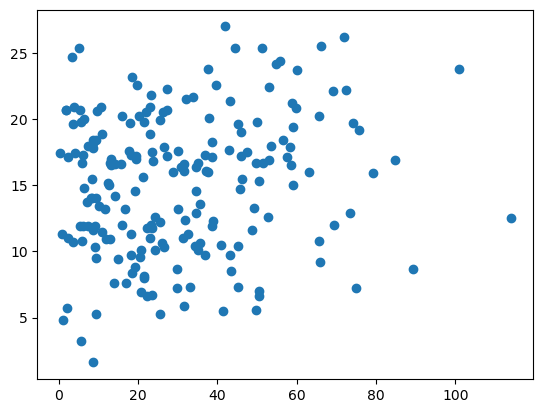

In [36]:
plt.scatter(x=df['Newspaper'],y=df['Sales'])

TypeError: 'tuple' object is not callable

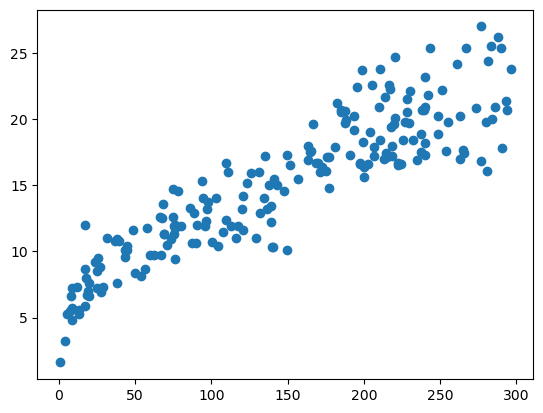

In [10]:
plt.scatter(x=df['TV'],y=df['Sales'])
#Linear Regression suits well.We can plot best fit line across the data
df.shape()

In [6]:
df.iloc[:,:-1]#Indepedent variables or features
X = df.drop('Sales',axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
df.iloc[:,-1]#Output col or Target varaible
Y = df['Sales']
Y.shape

(200,)

In [9]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [15]:
# Train the Linear Regression model using the training data
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict sales for the 20% unseen test data to compare with actual values
y_pred = Lr.predict(X_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [21]:
# Calculate the Mean Absolute Error (MAE) to measure prediction accuracy
from sklearn.metrics import r2_score, mean_absolute_error
mean_absolute_error(y_test, y_pred)

1.2748262109549344

In [22]:
# Calculate the R² score to evaluate how well the model explains the variance in sales
r2_score(y_test, y_pred)

0.9059011844150826

## Predictive System

In [26]:
df.iloc[0]

TV           230.1
Radio         37.8
Newspaper     69.2
Sales         22.1
Name: 0, dtype: float64

In [27]:
# Function to predict sales based on advertising budgets for TV, Radio, and Newspaper
def predict_sales(tv_budget, Radio_budget, Newspaper_budget):
    features = np.array([[tv_budget, Radio_budget, Newspaper_budget]])
    results = Lr.predict(features).reshape(1, -1)
    return results[0]

In [33]:
# Test the predictive system with one instance from the dataset
tv_budget = 44.5
Radio_budget = 39.3
Newspaper_budget = 45.1
Sales_budget = 10.4  # Actual sales value

predictive_sale = predict_sales(tv_budget, Radio_budget, Newspaper_budget)
print("Predicted Sales:", predictive_sale)
print("Actual Sales:", Sales_budget)

Predicted Sales: [11.30252447]
Actual Sales: 10.4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


###  Conclusion

The Linear Regression model effectively predicts product sales based on advertising budgets across TV, Radio, and Newspaper.  
With an **R² score of 0.90**, the model explains about **90% of the variance in sales**, showing a strong relationship between ad spending and sales performance.  

For example, when the actual sales were **22.1**, the model predicted **21.37**, demonstrating high prediction accuracy.  
This project highlights how data-driven insights can guide businesses in optimizing marketing budgets to maximize sales outcomes.


In [34]:
#Save the trained Linear Regression model as a pickle file for web-based deployment
import pickle
pickle.dump(Lr, open("LinearRegressionModel.pkl", 'wb'))